# Overview of the ``mdof`` package

<div>
<img src="./figures/mdof_overview.png" width="200"/>
</div>

The `mdof` package is designed to provide a convenient interface for computing dynamic analyses of structural vibrations.

## Installation

If you'd like to install `mdof` in your own environment to work with it locally, install mdof from [pypi](https://pypi.org/project/mdof/).  In your environment manager (e.g., Anaconda),

```bash
    pip install mdof
```

Install the required packages.

In [ ]:
!pip install -Ur requirements.txt

## Import

In Python, import the package.

In [1]:
import mdof

## Investigate Structural Vibrations

## 1. Simulate or load a structural response.

### *Given the modal parameters, what is the structural response data?*

In [2]:
from mdof.utilities.config import *
# time parameters
nt, dt, tf, times = create_time_vector(nt=5000,dt=0.03)
# system parameters
T, m, c, k, Phi = gather_system_parameters(T=[3,2],m=10,c=0.1)
# input motion
input_motion = generate_input(times)

Periods: [3 2]
Modeshapes: 
[[1. 0.]
 [0. 1.]]


In [3]:
# Calculate the response using numerical integration.
import sdof, numpy as np
output_motion = np.array([sdof.integrate(input_motion,dt,k[i],c,m)[0] for i in range(len(T))])

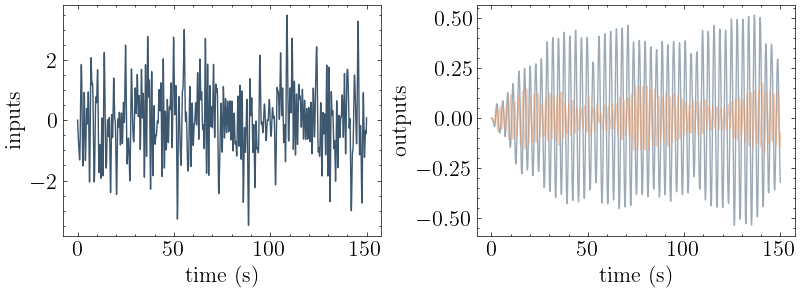

In [4]:
# Plot the input and output motions.
from mdof.utilities.printing import plot_io
plot_io(input_motion, output_motion, times)

## 2. Modal identification from data.

### *Given the structural response data, what are the modal parameters?*

<div><center>
<img src="./figures/mystery_system.png" width="550"/>
</center></div>

<div><center>
<img src="./figures/modal.png" width="550"/>
</center></div>

In [5]:
# With a state-space model:
periods, modeshapes = mdof.modes(input_motion, output_motion, dt=times[1]-times[0], order=2*len(T))
print(f"Periods identified from data: {np.round(periods, 3)}")
print(f"Mode shapes identified from data:\n {np.round(np.abs(modeshapes), 3)}")

100%|█████████▉| 4700/4701 [00:00<00:00, 6280.04it/s]


Periods identified from data: [3.002 2.002]
Mode shapes identified from data:
 [[1. 0.]
 [0. 1.]]


Periods identified from data: [3. 2.]
Mode shapes identified from data:
 [[1. 0.]
 [0. 1.]]


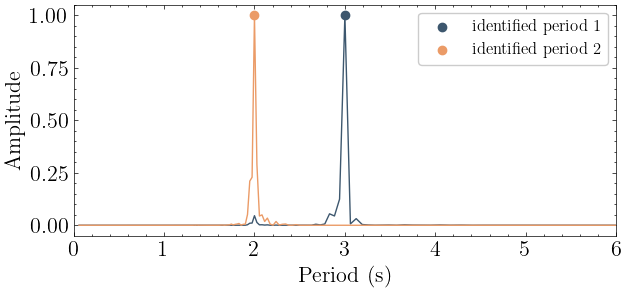

In [6]:
# With an input-output (transfer function) model:
from mdof.utilities.printing import plot_fdd
periods, modeshapes = plot_fdd(outputs=output_motion, dt=dt)
print(f"Periods identified from data: {np.round(periods, 3)}")
print(f"Mode shapes identified from data:\n {np.round(np.abs(modeshapes), 3)}")

## 3. Response prediction from data.

### *For any given input motion, can we generate the response of the system?*

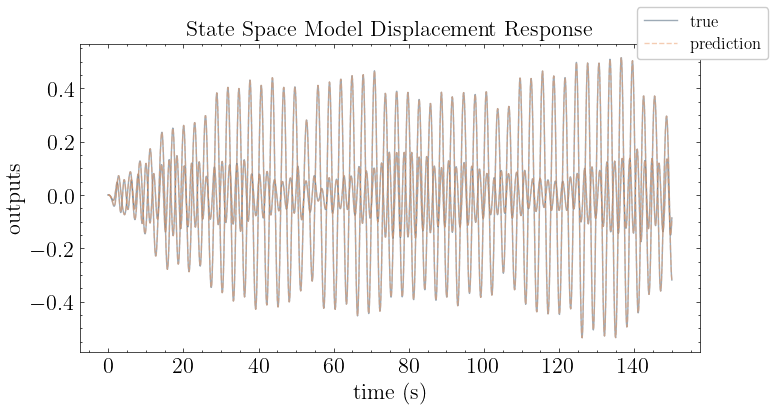

In [31]:
# Reproduce the response with the state space model
from control import ss, forced_response
from mdof.utilities.printing import plot_pred
d = 3
realization = mdof.system(method="okid-era-dc", inputs=input_motion[::d], outputs=output_motion[:,::d])
out_pred = forced_response(ss(*realization,dt/d), U=input_motion[::d], squeeze=False, return_x=False).outputs
plot_pred(ytrue=output_motion[:,::d], models=out_pred, t=times[::d], title="State Space Model Displacement Response")